In [1]:
@a01 = 26_094_681.0

@c1 = 196_808_461.0

@a02 = 109_243_693.0

@c2 = 100_464_893.0

@k = 160.0

@m = (2**31).to_f

def mkm(size, a0, beta)
    res = []
    a = a0
    size.times do
        a_c = beta * a
        a = (a_c - @m * (a_c / @m).floor)
        res.push(a / @m)
    end
    res
end

res1 = mkm(1000, @a01, [@c1, @m - @c1].max)
res1.last

0.875647783279419

In [2]:
def mm(size)
    b = mkm((@k + size).to_i, @a01, [@c1, @m - @c1].max)
    c = mkm(size, @a02, [@c2, @m - @c2].max)
    v = b[0...@k]
    res = []
    size.times do |t|
        s = (c[t] * @k).floor
        res.push(v[s])
        v[s] = b[t + @k]
    end
    res
end

res2 = mm(1000)
res2.last

0.7573730945587158

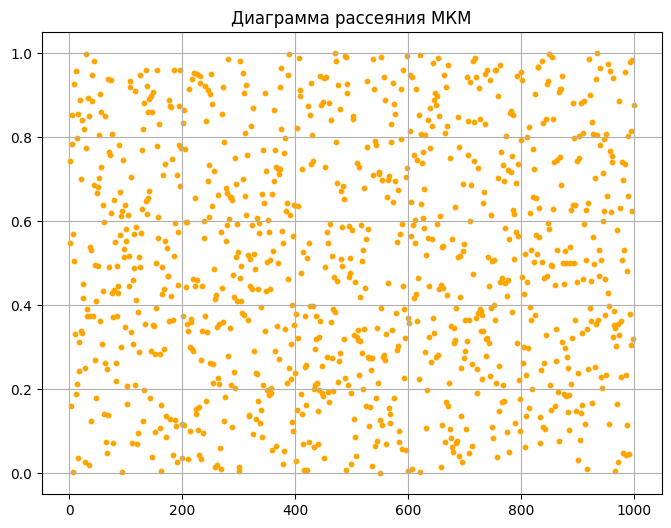

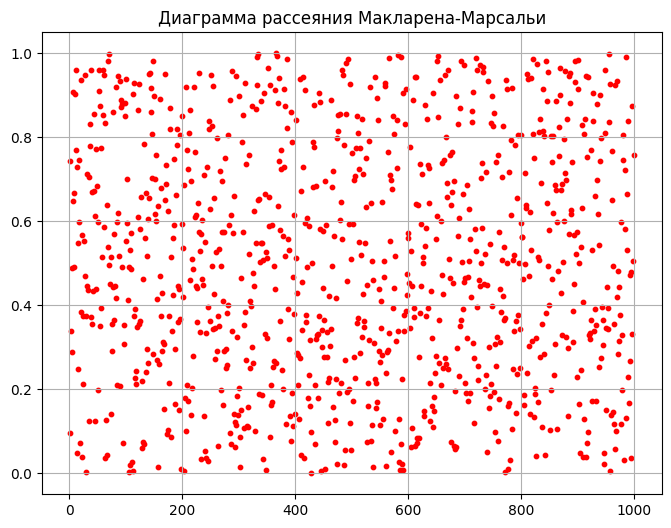

In [4]:
require 'matplotlib/iruby'
Matplotlib::IRuby.activate
plt = Matplotlib::Pyplot

plt.figure
plt.gcf().set_size_inches(8, 6)
plt.title("Диаграмма рассеяния МКМ")
plt.scatter((1..1000).to_a, res1, 10, "orange")
plt.grid
plt.show

plt.figure
plt.gcf().set_size_inches(8, 6)
plt.title("Диаграмма рассеяния Макларена-Марсальи")
plt.scatter((1..1000).to_a, res2, 10, "red")
plt.grid
plt.show

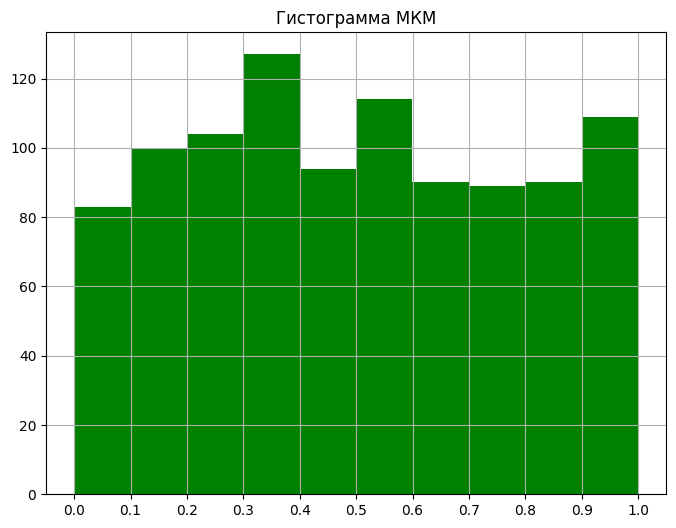

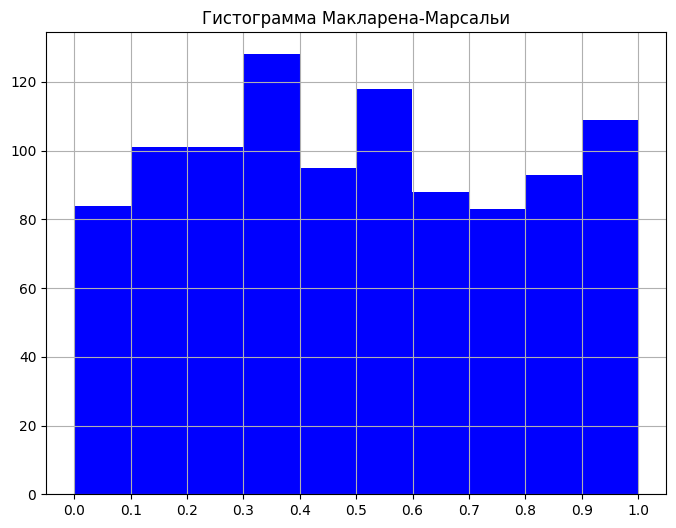

In [6]:
plt.figure
plt.gcf().set_size_inches(8, 6)
plt.title("Гистограмма МКМ")
plt.xticks((0..1).step(0.1).to_a)
plt.hist(res1, 10, cumulative: 0, color: 'green')
plt.grid
plt.show

plt.figure
plt.gcf().set_size_inches(8, 6)
plt.title("Гистограмма Макларена-Марсальи")
plt.xticks((0..1).step(0.1).to_a)
plt.hist(res2, 10, cumulative: 0, color: 'blue')
plt.grid
plt.show

In [20]:
def quantile(p)
    [3.719, 3.090, 2.326, 1.999, 1.960, 1.645, 1.282, 1.000, 0.000].[](
        [99.99, 99.90, 99.00, 97.72, 97.50, 95.00, 90.00, 84.13, 50.00].find_index { |i| i <= p * 100 }
        )
end

def test_moments(res, epsilon)
    delta = quantile(1 - epsilon / 2)
    n = res.size
    m = res.sum.to_f / n
    ksi1 = m - 0.5
    ksi2 = (res.map { |a| (a - m)**2 }.sum / (n - 1)) - 1.0 / 12
    c1 = (12*n)**0.5
    c2 = ((n - 1) * (0.0056 * n**-1 + 0.0028 * n**-2 - 0.0083 * n**-3)**-0.5) / n
    [c1 * ksi1.abs < delta ? 'H0' : 'H1', c2 * ksi2.abs < delta ? 'H0' : 'H1']
end

[test_moments(res1, 0.05), test_moments(res2, 0.05)]

[["H0", "H0"], ["H0", "H0"]]

In [21]:
def test_covariance(res, epsilon)
    delta = quantile(1 - epsilon / 2)
    t = 30
    n = res.size
    m = res.sum.to_f / n
    r_j = (0..t).map { |j| ((0...(n - j)).map { |i| res[i]*res[i + j] }.sum / (n - j - 1)) - ((n * m**2) / (n - 1))}
    r_j.map.with_index do
        |r, j| (r - (j == 0 ? 1.0 / 12 : 0)).abs < (j == 0 ? 2**0.5 : 1.0) * delta / (12 * (n - 1)**0.5) ? 'H0' : "H1: #{r}"
    end
end

[test_covariance(res1, 0.05), test_covariance(res2, 0.05)]

[["H0", "H0", "H0", "H0", "H0", "H0", "H1: -0.005214187485962196", "H0", "H0", "H0", "H0", "H0", "H0", "H1: -0.00861141808227281", "H0", "H0", "H0", "H0", "H1: 0.005233939694525985", "H0", "H1: 0.006121957230942249", "H0", "H0", "H1: -0.005372319914334345", "H0", "H0", "H0", "H0", "H0", "H0", "H0"], ["H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0", "H0"]]